# Solution by Johannes Rieke

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Synaptic current

#### a) Plot the following curves for a single pre-synaptic spike in one ﬁgure

In [2]:
tau_syn = 10e-3
tau_m = 10e-3
R_m = 1e7
g_max = 30e-9
E_m = -80e-3
I_e = 0

Inhibitory synapse

In [3]:
E_syn = E_exc = -100e-3

In [4]:
dt = 0.001
t = np.arange(0, 0.14, dt)
V = np.zeros_like(t)
x = np.zeros_like(t)
g_syn = np.zeros_like(t)
I_syn = np.zeros_like(t)
I_m = np.zeros_like(t)

x[0] = 0
g_syn[0] = 0
V[0] = E_m

In [5]:
for i in range(len(t)-1):
    I_syn[i] = g_syn[i] * (V[i] - E_syn)
    I_m[i] = (V[i] - E_m) / R_m
    V[i+1] = V[i] + dt * (-V[i] + E_m - R_m * I_syn[i] + R_m * I_e) / tau_m
    x[i+1] = x[i] + dt * (-x[i]) / tau_syn
    g_syn[i+1] = g_syn[i] + dt * (x[i] - g_syn[i]) / tau_syn
    
    if i == 10:  # spike
        x[i+1] += g_max

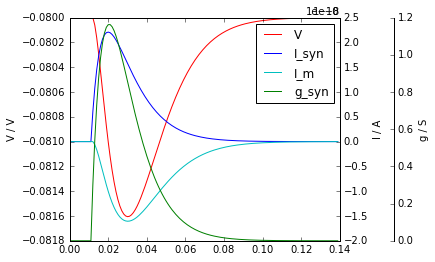

In [6]:
# Make three y axes, see http://stackoverflow.com/questions/7733693/matplotlib-overlay-plots-with-different-scales
fig, ax = plt.subplots()
axes = [ax, ax.twinx(), ax.twinx()]
fig.subplots_adjust(right=0.75)
axes[-1].spines['right'].set_position(('axes', 1.2))
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

axes[0].plot(t, V, 'r', label='V')
axes[0].set_ylabel('V / V')

axes[1].plot(t, I_syn, 'b', label='I_syn')
axes[1].plot(t, I_m, 'c', label='I_m')
axes[1].set_ylabel('I / A')

axes[2].plot(t, g_syn, 'g', label='g_syn')
axes[2].set_ylabel('g / S')


lines, labels = [], []
for ax in axes:
    li, la = ax.get_legend_handles_labels()
    lines.extend(li)
    labels.extend(la)
axes[2].legend(lines, labels, loc=0)

Excitatory synapse

In [7]:
E_syn = E_exc = 0

In [8]:
dt = 0.001
t = np.arange(0, 0.14, dt)
V = np.zeros_like(t)
x = np.zeros_like(t)
g_syn = np.zeros_like(t)
I_syn = np.zeros_like(t)
I_m = np.zeros_like(t)

x[0] = 0
g_syn[0] = 0
V[0] = E_m

In [9]:
for i in range(len(t)-1):
    I_syn[i] = g_syn[i] * (V[i] - E_syn)
    I_m[i] = (V[i] - E_m) / R_m
    V[i+1] = V[i] + dt * (-V[i] + E_m - R_m * I_syn[i] + R_m * I_e) / tau_m
    x[i+1] = x[i] + dt * (-x[i]) / tau_syn
    g_syn[i+1] = g_syn[i] + dt * (x[i] - g_syn[i]) / tau_syn
    
    if i == 10:  # spike
        x[i+1] += g_max

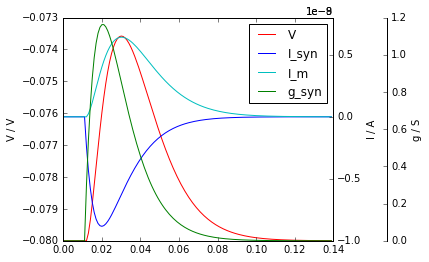

In [10]:
# Make three y axes, see http://stackoverflow.com/questions/7733693/matplotlib-overlay-plots-with-different-scales
fig, ax = plt.subplots()
axes = [ax, ax.twinx(), ax.twinx()]
fig.subplots_adjust(right=0.75)
axes[-1].spines['right'].set_position(('axes', 1.2))
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

axes[0].plot(t, V, 'r', label='V')
axes[0].set_ylabel('V / V')

axes[1].plot(t, I_syn, 'b', label='I_syn')
axes[1].plot(t, I_m, 'c', label='I_m')
axes[1].set_ylabel('I / A')

axes[2].plot(t, g_syn, 'g', label='g_syn')
axes[2].set_ylabel('g / S')
axes[2].set_xlabel('t / s')


lines, labels = [], []
for ax in axes:
    li, la = ax.get_legend_handles_labels()
    lines.extend(li)
    labels.extend(la)
axes[2].legend(lines, labels, loc=0)

In [11]:
# Copy voltage trace for b)
V_exercise_a = V.copy()

#### b) Simulate the membrane response to a transient excitatory synaptic input

In [12]:
dt = 0.001
t = np.arange(0, 0.14, dt)
V = np.zeros_like(t)
x = np.zeros_like(t)
g_syn = np.zeros_like(t)
I_syn = np.zeros_like(t)
I_m = np.zeros_like(t)

x[0] = 0
g_syn[0] = 0
V[0] = E_m

In [13]:
g_exc = 50e-9
g_inh = 200e-9
E_inh = -100e-3
E_exc = 0

E_syn = E_exc  # excitatory synapse

In [14]:
for i in range(len(t)-1):
    I_syn[i] = g_syn[i] * (V[i] - E_syn) + g_exc * (V[i] - E_exc) + g_inh * (V[i] - E_inh)
    I_m[i] = (V[i] - E_m) / R_m
    V[i+1] = V[i] + dt * (-V[i] + E_m - R_m * I_syn[i] + R_m * I_e) / tau_m
    x[i+1] = x[i] + dt * (-x[i]) / tau_syn
    g_syn[i+1] = g_syn[i] + dt * (x[i] - g_syn[i]) / tau_syn
    
    if i == 10:  # spike
        x[i+1] += g_max

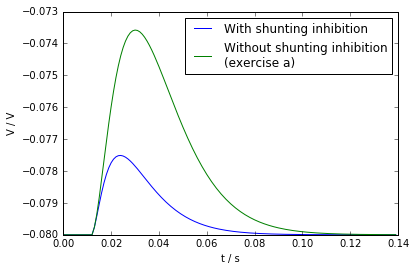

In [15]:
plt.plot(t, V, label='With shunting inhibition')
plt.plot(t, V_exercise_a, label='Without shunting inhibition\n(exercise a)')
plt.ylabel('V / V')
plt.xlabel('t / s')
plt.legend()

The EPSP is smaller if the other synapses are active. This is due to the inhibitory synapses, which reduce the input resistance of the membrane. Due to Ohm's law, this reduces the amplitude of the membrane potential.

## 2. Integrate-and-fire neuron

In [16]:
V_th = -54e-3
V_reset = E_m

#### a) + b) Use the integration with reset and simulate the neuron

In [17]:
I_e = 2.65e-9

In [18]:
dt = 0.001
t = np.arange(0, 0.5, dt)
V = np.zeros_like(t)
I_m = np.zeros_like(t)

V[0] = E_m

In [19]:
spike_count = 0
for i in range(len(t)-1):
    V[i+1] = V[i] + dt * (-V[i] + E_m + R_m * I_e) / tau_m  # no synaptic current
    if V[i+1] > V_th:
        V[i+1] = V_reset
        spike_count += 1

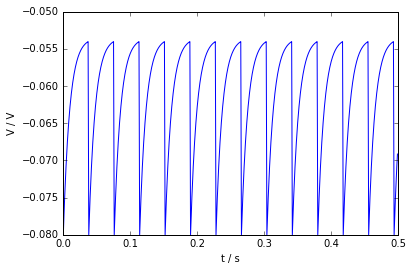

In [20]:
plt.plot(t, V)
plt.ylabel('V / V')
plt.xlabel('t / s')

In [21]:
print 'Estimate of firing frequency:', spike_count / 0.5, 'Hz'

Estimate of firing frequency: 26.0 Hz


Inverse of 26 Hz is 39 ms, which is approximately the ISI in the plot above. 

#### c) Calculate the mean ﬁring rate as a function of input current

In [22]:
I_es = np.linspace(0, 5e-9)
firing_rates = []

for I_e in I_es:

    dt = 0.001
    t = np.arange(0, 0.5, dt)
    V = np.zeros_like(t)
    I_m = np.zeros_like(t)

    V[0] = E_m

    spike_count = 0
    for i in range(len(t)-1):
        V[i+1] = V[i] + dt * (-V[i] + E_m + R_m * I_e) / tau_m  # no synaptic current
        if V[i+1] > V_th:
            V[i+1] = V_reset
            spike_count += 1
            
    firing_rates.append(spike_count / 0.5)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log


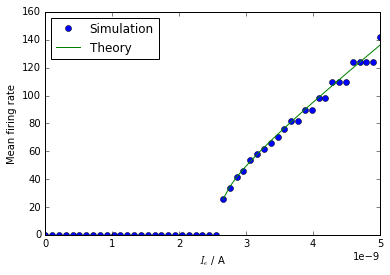

In [23]:
plt.plot(I_es, firing_rates, 'o', label='Simulation')
plt.xlabel('$I_e$ / A')
plt.ylabel('Mean firing rate')

def r_0(I_e):
    return 1. / (tau_m * np.log((R_m * I_e + E_m - V_reset) / (R_m * I_e + E_m - V_th)))

plt.plot(I_es, np.vectorize(r_0)(I_es), label='Theory')

plt.legend(numpoints=1, loc='upper left')

The plot shows a good fit of simulation and theory, even though the calculation of the simulated firing rate is only a rough approximation.